<a href="https://www.kaggle.com/code/jonathanrot/football-eda-analysis?scriptVersionId=181106567" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# At the request of the FIFA management, as part of a statistical study, we will create a model allowing us to build a team composed of the best performing players according to certain criteria.

  Objective
1. * Analysis of players performances (by age, nationality, number of goals/matches played...).
2. * Construction of a high-performance team made up of 10 players (defenders, midfielders and attackers), according to very precise selection criteria, which can be applied to any model.

*Let's start by importing the recquired packages for our analysis*

In [1]:
# Import the required packages
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

*Then we import our dataset*

In [2]:
# Loading the initial dataset
player_stats = pd.read_csv("../input/20222023-football-player-stats/2022-2023 Football Player Stats.csv", sep = ';', encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', None)
player_stats.head(5)

# Divide the contents of the 'Goals' column by 10
player_stats['Goals'] = player_stats['Goals'] / 10

# Display the updated DataFrame
player_stats.head(5)



,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,0.1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0.0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0.0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,0.1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0.0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,4

*The specific use of sep, encoding, and max_columns ensures that the data is read correctly and displayed as intended.*

* # 1.Data Cleaning

**Finding missing values**

In [3]:
# Find missing values in the DataFrame
player_stats.isnull().sum()

Rk         0
Player     0
Nation     1
Pos        0
Squad      0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 124, dtype: int64

there is only 1 missing value

In [4]:
# Find the missing value in the DataFrame for the specific player
player_stats[player_stats.isnull().any(axis=1)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1875,1876,David Ozoh,NaN,FW,Crystal Palace,Premier League,17,2005,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,100.0,24.0,0.0,3.0,3.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*After a manual search it is an English player*

**Finding the different player's positions**

In [5]:
# Player's positions
player_stats['Pos'].unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'GK', 'DFMF',
       'FWDF'], dtype=object)

*There is 10 category of positions*

**Removing the columns we don't need**

In [6]:
# Removing following columns
player_stats = player_stats.drop(['Rk', 'Born', 'PasAtt', 'Crs'], axis = 1)
player_stats.head(5)

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,20,19,1596,17.7,0.1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,22,22,1980,22.0,0.0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,14,8,770,8.6,0.0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,20,20,1799,20.0,0.1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,15,15,1165,12.9,0.0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


**Creating a new dataframe and remodeling the information from the important columns we need for our analysis to make the table understandable**

In [7]:
# New DataFrame
df_player_stats = pd.DataFrame()

In [8]:
# Rename columns and calculation of the necessary data
df_player_stats['Player'] = player_stats['Player']
df_player_stats['Nation'] = player_stats['Nation']
df_player_stats['Position'] = player_stats['Pos']
df_player_stats['Squad'] = player_stats['Squad']
df_player_stats['Comp'] = player_stats['Comp']
df_player_stats['Age'] = player_stats['Age']
df_player_stats['Appearances'] = player_stats['MP']
df_player_stats['G/90'] = player_stats['Goals']
df_player_stats['G/Sh'] = player_stats['G/Sh']
df_player_stats['PKGoals'] = ((player_stats['ShoPK'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['PKAttempted'] = ((player_stats['PKatt'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['Goals'] = ((player_stats['Goals'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['Pass'] = ((player_stats['PasTotAtt'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['PassCompleted'] = ((player_stats['PasTotCmp'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['PassComp%'] = ((df_player_stats['PassCompleted'] / df_player_stats['Pass']) * 100).round(2)
df_player_stats['Assist'] = ((player_stats['Assists'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['Cross'] = ((player_stats['PasCrs'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['CrossCompleted'] = ((player_stats['CrsPA'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['CrossComp%'] = ((df_player_stats['CrossCompleted'] / df_player_stats['Cross']) * 100).round(2)
df_player_stats['Tackle_Won'] = ((player_stats['TklWon'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['SucDribble'] = ((player_stats['ScaDrib'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['Dribble'] = ((player_stats['TklDri'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['DribbleComp%'] = ((df_player_stats['SucDribble'] / df_player_stats['Dribble']) * 100).round(2)
df_player_stats['YCards'] = ((player_stats['CrdY'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['RCards'] = ((player_stats['CrdR'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['Fls'] = ((player_stats['Fls'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['Fld'] = ((player_stats['Fld'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['OGoals'] = ((player_stats['OG'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['AerWon'] = ((player_stats['AerWon'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['AerLost'] = ((player_stats['AerLost'] * player_stats['Min']) / 90).round(0).astype(int)
df_player_stats['AerWon%'] = ((player_stats['AerWon'] / (player_stats['AerWon'] + player_stats['AerLost'])) * 100).round(2)

* # 2.General Statistics

In [9]:
df_player_stats.head(5)

,Player,Nation,Position,Squad,Comp,Age,Appearances,G/90,G/Sh,PKGoals,PKAttempted,Goals,Pass,PassCompleted,PassComp%,Assist,Cross,CrossCompleted,CrossComp%,Tackle_Won,SucDribble,Dribble,DribbleComp%,YCards,RCards,Fls,Fld,OGoals,AerWon,AerLost,AerWon%
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,20,0.1,0.04,0,0,2,550,411,74.73,2,45,2,4.44,9,4,9,44.44,2,0,11,40,0,6,21,22.22
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,22,0.0,0.00,0,0,0,1038,847,81.60,1,4,0,0.00,35,0,29,0.00,2,0,29,11,0,48,27,63.93
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,14,0.0,0.00,0,0,0,424,342,80.66,0,9,3,33.33,12,0,14,0.00,1,0,15,11,0,8,9,46.97
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,20,0.1,0.08,0,0,2,1297,1189,91.67,0,7,2,28.57,16,2,17,11.76,3,0,49,27,1,10,10,50.00
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,15,0.0,0.00,0,0,0,562,491,87.37,1,3,0,0.00,26,0,17,0.00,2,0,12,13,0,4,5,44.29


**Exploratory Analysis and Visualization**

*Before plotting graphs, Let’s first get some insights from our dataset using the .describe() method provided by pandas.*

In [10]:
player_stats.describe()

,Age,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,26.011157,11.833023,8.476013,760.451097,8.450465,0.102752,1.245787,0.411261,24.222164,0.064210,0.167374,14.141726,0.035920,0.008111,0.010945,33.348204,42.701882,75.489773,577.364187,198.385950,15.389275,17.784968,84.270807,13.590718,16.197352,78.697285,3.269732,5.964154,51.159799,0.083466,0.866936,2.529621,0.738103,0.197713,3.331097,38.572090,3.955508,1.005110,0.108167,0.312916,1.661636,1.832904,0.41315,0.175627,0.157441,0.003079,33.348204,0.173871,0.913009,2.071179,1.498059,0.167683,0.112588,0.14881,0.108676,0.035459,0.209583,0.144102,0.010242,0.013942,0.026021,0.012622,0.00267,1.701655,0.990569,0.816422,0.648635,0.236664,0.750398,1.444533,44.535106,0.694080,1.079762,0.275385,0.804522,0.820331,2.521261,1.574704,0.022350,53.651023,4.613027,15.713856,24.237754,14.262763,2.161078,53.639903,1.817869,0.729093,34.399702,0.860033,37.415210,31.611711,170.765946,82.638732,1.679989,1.270476,0.434883,1.682049,1.056794,34.369636,3.970714,0.246222,0.020688,0.006761,1.319788,1.146991,0.204697,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,43.583600
std,4.446259,6.864278,6.994383,591.094260,6.567484,0.201371,1.424619,0.754716,24.249242,0.118826,0.263501,8.677582,0.198595,0.041589,0.051776,17.027779,18.447543,13.113075,324.007185,145.782161,8.486637,9.050574,15.280160,9.142460,9.683369,19.294651,2.952956,4.975162,24.030708,0.276581,1.078650,2.207206,1.065411,0.518301,2.629106,17.567568,4.005617,1.176429,0.381662,0.566358,2.319000,3.333445,1.07893,0.643655,0.504091,0.028629,17.027779,0.407284,1.087060,1.913766,1.453089,0.480929,0.447581,0.45827,0.270573,0.156976,0.462712,0.344309,0.052678,0.136515,0.249190,0.054875,0.02362,1.729327,1.235965,1.156952,0.909804,0.566928,1.000632,1.520987,30.431628,0.972013,1.188531,0.484980,1.094028,0.882421,2.103961,1.

**Analysing the relationship beetween the age and the player's performance**

In [11]:
# Minimum Age of the players
df_player_stats['Age'].min()

15

In [12]:
df_player_stats[df_player_stats.Age == 15.0].iloc[:, 0:6]


,Player,Nation,Position,Squad,Comp,Age
1811,Ethan Nwaneri,ENG,FW,Arsenal,Premier League,15


In [13]:
# Maximum Age of the players
df_player_stats['Age'].max()

41

In [14]:
df_player_stats[df_player_stats.Age == 41.0].iloc[:, 0:6]

,Player,Nation,Position,Squad,Comp,Age
1207,Joaquín,ESP,MFFW,Betis,La Liga,41
1459,Diego López,ESP,GK,Rayo Vallecano,La Liga,41
1923,Gianluca Pegolo,ITA,GK,Sassuolo,Serie A,41


**Who is the youngest team?**

In [15]:
avg_age = df_player_stats.groupby(['Squad', 'Comp']).agg({'Age': lambda x: x.mean(skipna=True)}).round(4)
avg_age = pd.DataFrame(avg_age).reset_index()
avg_age.columns = ['Squad', 'Comp', 'AvgAge']
#avg_age

In [16]:
avg_age['AvgAge'].min()

23.3793

In [17]:
avg_age[avg_age.AvgAge == 23.3793]

,Squad,Comp,AvgAge
73,Reims,Ligue 1,23.3793


**who is the oldest team?**

In [18]:
avg_age['AvgAge'].max()

28.3043

In [19]:
avg_age[avg_age.AvgAge == 28.3043]

,Squad,Comp,AvgAge
39,Inter,Serie A,28.3043


# Analysing the relation beetween the players performance and their age

In [20]:
# Plotting the scatterplot
fig = px.scatter(df_player_stats, x='Age', y='Goals', trendline='ols', title='Age vs Goals Scored')

# Updating layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Goals Scored',
    title='Age vs Goals Scored'
)

# Show the plot
fig.show()



In [21]:
# Calculation the total goals scored
total_goals = player_stats['Goals'].sum()
print("Total goals scored:", total_goals)

Total goals scored: 276.3


*We can see that there is a relation beetween the age of the players and their performance as they got older, the player's performance decrease*

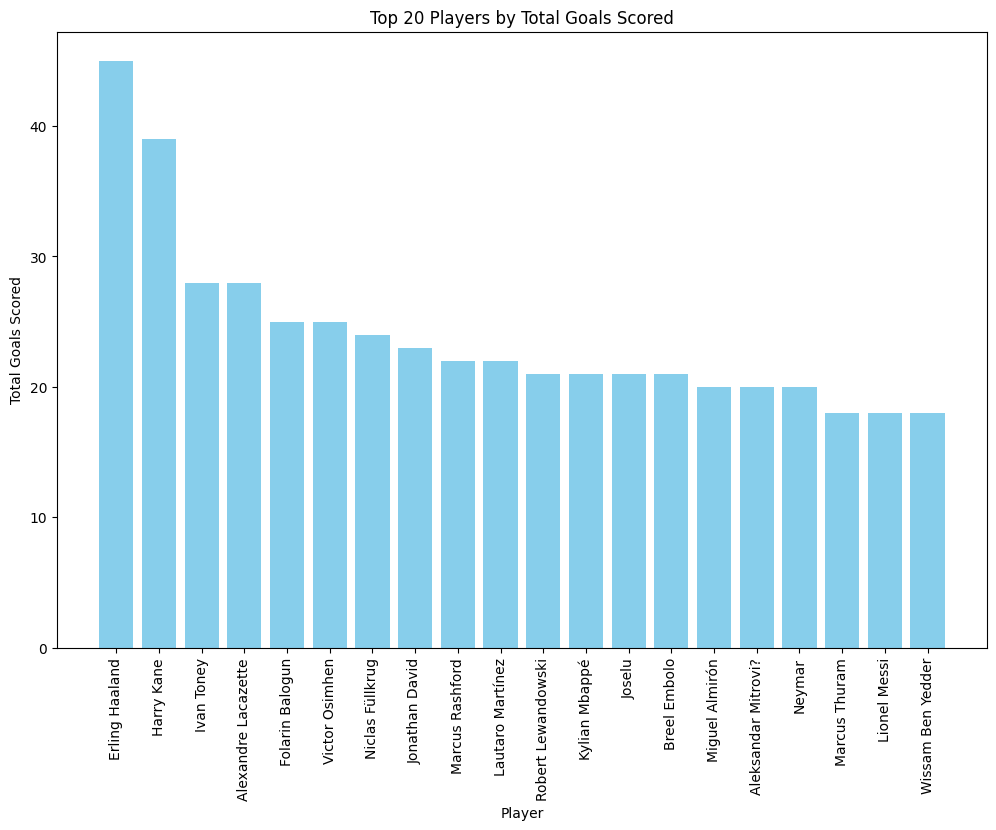

In [22]:
# Group the DataFrame by player name and sum the number of goals
goals_by_player = df_player_stats.groupby('Player')['Goals'].sum().reset_index()

# Sort the result DataFrame by total goals scored
goals_by_player_sorted = goals_by_player.sort_values(by='Goals', ascending=False)

# Select the top 20 players
top_20_players = goals_by_player_sorted.head(20)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(top_20_players['Player'], top_20_players['Goals'], color='skyblue')
plt.xlabel('Player')
plt.ylabel('Total Goals Scored')
plt.title('Top 20 Players by Total Goals Scored')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [23]:
# Filter the DataFrame for Erling Haaland
haaland_goals = df_player_stats[df_player_stats['Player'] == 'Erling Haaland']['Goals'].sum()

print("Total goals scored by Erling Haaland:", haaland_goals)


Total goals scored by Erling Haaland: 45


* # 3.Building our team

**A/Choice of defendants :
Good defenders are able to read the game very well and sense where the danger is in time. They know when to join the party (attacking) or sit back and defend. Although they are rare to find, there are defenders who can do more than their own job by assisting goals and scoring themselves as well.**

To choose our defendants we will choose 4 criteria in order of importance :

1. no red card
2. low number of yellow cards : 1 maximum
3. Successful aerial game (passing game)
4. Successfull pass completion, occurs when an eligible receiver (usually a wide receiver, tight end or running back) successfully catches a forward pass thrown by the quarterback without the ball touching the ground.

In [24]:
# Given percentages for each criterion
percentages = {
    'No red card': 60,
    'low number of yellow cards': 10,
    'Successful aerial game': 15,
    'Successfull pass completion': 15
}

# Calculate the weighted scores for each criterion
weighted_scores = {criteria: percentage / 100 for criteria, percentage in percentages.items()}

# Plotting the pie chart
fig = px.pie(values=list(weighted_scores.values()), names=list(weighted_scores.keys()),
             title='Distribution of desired criterias for our defendants (in %)*', hole=0.3)
fig.show()

**Given the multitude of choice possibilities, we have taken the liberty of determining what the selection criteria are in order of importance. the percentages represent a degree of importance for our choice. Example: 60% represents the most important criterion, namely not having received a red card because it is an eliminatory criterion for our selection of defenders*

**Who are the most successful defenders? (0 red cards and 1 yellow card maximum)**

In [25]:
# Showing defenders (DF) with maximum 1 yellow card and 0 red cards
defenders_max_one_yellow_card = df_player_stats[
    (df_player_stats['Age'] < 30) &  # Filter for players under 30 years old
    (df_player_stats['Appearances'] >= 20) &  # Filter for players with at least 20 appearances
    (df_player_stats['Position'] == 'DF') &  # Filter for defenders (DF)
    (df_player_stats['RCards'] == 0) &  # Filter for players with 0 red cards
    (df_player_stats['YCards'] <= 1)  # Filter for players with maximum 1 yellow card
].sort_values(['YCards', 'AerWon%', 'PassComp%'], ascending=[False, False, False]).head(20).iloc[:, [0, 1, 2, 3, 4, 5, 6, 14, 23 ,24, 30]]

(defenders_max_one_yellow_card)


,Player,Nation,Position,Squad,Comp,Age,Appearances,PassComp%,YCards,RCards,AerWon%
322,Sven Botman,NED,DF,Newcastle Utd,Premier League,23,20,85.91,1,0,66.00
2111,Alessio Romagnoli,ITA,DF,Lazio,Serie A,28,21,88.92,1,0,65.30
1432,Philipp Lienhart,AUT,DF,Freiburg,Bundesliga,26,20,85.92,1,0,64.69
2479,Adrien Truffert,FRA,DF,Rennes,Ligue 1,21,22,79.95,1,0,57.95
140,Tommaso Augello,ITA,DF,Sampdoria,Serie A,28,20,72.00,1,0,53.11
2393,Montassar Talbi,TUN,DF,Lorient,Ligue 1,24,22,88.76,0,0,71.33
1100,Rico Henry,ENG,DF,Brentford,Premier League,25,21,71.78,0,0,37.07
925,Francisco Garcia,ESP,DF,Rayo Vallecano,La Liga,23,20,80.20,0,0,26.67
688,Federico Dimarco,ITA,DF,Inter,Serie A,25,21,72.21,0,0,24.66


*We are going to create a new indicator which combines the 2 criteria aer_won and pass_comp which we will call: "defense performance index"
the selection criteria chosen to combine together are as follows:
aer_won < 25 = weak level,
aer_ won between 26 and 60 = normal level,
pass_comp > 75 = high level, 
pass_comp < 75 = normal level.
The stat levels were chosen on a personal selection basis*

In [26]:
# Define a function to assign performance index based on AerWon% and PassComp% values
def performance_index(aer_won, pass_comp):
    if aer_won < 25:
        return 'Weak'
    elif 26 <= aer_won <= 60:
        if pass_comp > 75:
            return 'High'
        else:
            return 'Normal'
    else:
        if pass_comp > 75:
            return 'High'
        else:
            return 'Normal'

# Apply the function to create the new column
defenders_max_one_yellow_card['Defense Performance Index'] = defenders_max_one_yellow_card.apply(lambda x: performance_index(x['AerWon%'], x['PassComp%']), axis=1)

# Display the DataFrame with the new column
(defenders_max_one_yellow_card)


,Player,Nation,Position,Squad,Comp,Age,Appearances,PassComp%,YCards,RCards,AerWon%,Defense Performance Index
322,Sven Botman,NED,DF,Newcastle Utd,Premier League,23,20,85.91,1,0,66.00,High
2111,Alessio Romagnoli,ITA,DF,Lazio,Serie A,28,21,88.92,1,0,65.30,High
1432,Philipp Lienhart,AUT,DF,Freiburg,Bundesliga,26,20,85.92,1,0,64.69,High
2479,Adrien Truffert,FRA,DF,Rennes,Ligue 1,21,22,79.95,1,0,57.95,High
140,Tommaso Augello,ITA,DF,Sampdoria,Serie A,28,20,72.00,1,0,53.11,Normal
2393,Montassar Talbi,TUN,DF,Lorient,Ligue 1,24,22,88.76,0,0,71.33,High
1100,Rico Henry,ENG,DF,Brentford,Premier League,25,21,71.78,0,0,37.07,Normal
925,Francisco Garcia,ESP,DF,Rayo Vallecano,La Liga,23,20,80.20,0,0,26.67,High
688,Federico Dimarco,ITA,DF,Inter,Serie A,25,21,72.21,0,0,24.66,Weak


*Now we can choose 4 players among those who have been classified among the best defenders in the high category*

**B/Choice of midfielders :
Mid-fielders dictate the tempo of the game, they help their attacking or defending team mates depending on the situation of their team is in. Their ability to thread in an incisive pass or their awarness to sense danger before their defending colleagues are in trouble are crucial qualities of a good mid-fielder.**

To choose our midfielders we will choose 3 criteria in order of importance :

1. successfull pass completion 
2. Successfull tackles won, are deemed to be when the tackler or one of their teammates regains possession because of the challenge, or that the ball goes out of play and is safe
3. Successful dribbles,means the player beats the defender while retaining possession


In [27]:
# Given percentages for each criterion
percentages = {
    'pass completion': 50,
    'tackles won': 30,
    'Successful dribbles ': 20,
}

# Calculate the weighted scores for each criterion
weighted_scores = {criteria: percentage / 100 for criteria, percentage in percentages.items()}

# Plotting the pie chart
fig = px.pie(values=list(weighted_scores.values()), names=list(weighted_scores.keys()),
             title='Distribution of desired criterias for our midfielders (in %)', hole=0.3)
fig.show()

**who are the most efficient midfielders according to the criteria chosen previously?**

In [28]:
# Showing midfielders with the selected criteria
top_midfielders = df_player_stats[
    (df_player_stats['Age'] < 30) &  # Filter for players under 30 years old
    (df_player_stats['Appearances'] >= 20) &  # Filter for players with at least 20 appearances
    (df_player_stats['Position'] == 'MF')  # Filter for midfielders (MF)
].sort_values(['Tackle_Won', 'PassComp%', 'DribbleComp%'], ascending=[False, False, False]).head(10).iloc[:, [0, 1, 2, 3, 4, 5, 12, 14, 19, 22]]

(top_midfielders)


,Player,Nation,Position,Squad,Comp,Age,Pass,PassComp%,Tackle_Won,DribbleComp%
1885,João Palhinha,POR,MF,Fulham,Premier League,27,758,80.47,56,0.00
1334,Tom Krauß,GER,MF,Schalke 04,Bundesliga,21,524,72.52,48,5.88
1396,Enzo Le Fée,FRA,MF,Lorient,Ligue 1,23,1298,79.58,46,10.00
2341,Stijn Spierings,NED,MF,Toulouse,Ligue 1,26,1320,84.70,43,3.33
566,Bryan Cristante,ITA,MF,Roma,Serie A,27,1083,81.53,37,0.00
730,Cheick Doucouré,MLI,MF,Crystal Palace,Premier League,23,772,83.16,35,9.52
1118,Morten Hjulmand,DEN,MF,Lecce,Serie A,23,752,78.06,30,0.00
2120,Valentin Rongier,FRA,MF,Marseille,Ligue 1,28,1294,88.72,29,4.55
2098,Rodri,ESP,MF,Manchester City,Premier League,26,1866,91.21,28,0.00
389,Moisés Caicedo,ECU,MF,Brighton,Premier League,21,1180,88.05,28,0.00


*Adding a new performance index based on tackle_won (>35% = high level) only when associated with high level of dribble_comp (> 5%) we'll call this new indicator : "midfielders performance index", stat levels were chosen on a personal selection basis*

In [29]:
# Define a function to assign performance index based on DribbleComp% values
def performance_index(tackle_won, dribble_comp):
    if tackle_won < 20:
        return 'Weak'
    elif 20 <= tackle_won <= 35:
        if dribble_comp < 3:
            return 'Weak'
        elif 3 <= dribble_comp <= 5:
            return 'Normal'
        else:
            return 'High'
    else:
        if dribble_comp < 3:
            return 'Weak'
        elif 3 <= dribble_comp <= 5:
            return 'Normal'
        else:
            return 'High'

# Apply the function to create the new column
top_midfielders['Midfielders Performance Index'] = top_midfielders.apply(lambda x: performance_index(x['Tackle_Won'], x['DribbleComp%']), axis=1)

# Display the DataFrame with the new column
(top_midfielders)


,Player,Nation,Position,Squad,Comp,Age,Pass,PassComp%,Tackle_Won,DribbleComp%,Midfielders Performance Index
1885,João Palhinha,POR,MF,Fulham,Premier League,27,758,80.47,56,0.00,Weak
1334,Tom Krauß,GER,MF,Schalke 04,Bundesliga,21,524,72.52,48,5.88,High
1396,Enzo Le Fée,FRA,MF,Lorient,Ligue 1,23,1298,79.58,46,10.00,High
2341,Stijn Spierings,NED,MF,Toulouse,Ligue 1,26,1320,84.70,43,3.33,Normal
566,Bryan Cristante,ITA,MF,Roma,Serie A,27,1083,81.53,37,0.00,Weak
730,Cheick Doucouré,MLI,MF,Crystal Palace,Premier League,23,772,83.16,35,9.52,High
1118,Morten Hjulmand,DEN,MF,Lecce,Serie A,23,752,78.06,30,0.00,Weak
2120,Valentin Rongier,FRA,MF,Marseille,Ligue 1,28,1294,88.72,29,4.55,Normal
2098,Rodri,ESP,MF,Manchester City,Premier League,26,1866,91.21,28,0.00,Weak
389,Moisés Caicedo,ECU,MF,Brighton,Premier League,21,1180,88.05,28,0.00,Weak


*we can choose at least 3 players who are ranked as High and one player who is ranked as normal*

**C/Choice of attackers :
Scoring more goals that your opponent will do just that
young
a lot of goals**

To choose our attackers we will choose 4 criteria in order of importance :
1. Number of goals per 90-minute matches
2. Age: up to 30 years 
4. Best shooters 
5. Top penalty scorers 

In [30]:
# Given percentages for each criterion
percentages = {
    'Number of goals per 90-minute matches': 50,
    'Age (up to 30 years)': 30,
    'Best shooters': 10,
    'Top penalty scorers': 10
}

# Calculate the weighted scores for each criterion
weighted_scores = {criteria: percentage / 100 for criteria, percentage in percentages.items()}

# Plotting the pie chart
fig = px.pie(values=list(weighted_scores.values()), names=list(weighted_scores.keys()),
             title='Distribution of desired criterias for our attackers (in %)', hole=0.3)
fig.show()


In [31]:
df_player_stats.sort_values('Goals', ascending = False).head(5).iloc[:, [0,1,2,3,4,5,11]]

,Player,Nation,Position,Squad,Comp,Age,Goals
1057,Erling Haaland,NOR,FW,Manchester City,Premier League,22,45
1260,Harry Kane,ENG,FW,Tottenham,Premier League,29,39
1358,Alexandre Lacazette,FRA,FW,Lyon,Ligue 1,31,28
2451,Ivan Toney,ENG,FW,Brentford,Premier League,26,28
184,Folarin Balogun,ENG,FW,Reims,Ligue 1,21,25


In [32]:
# Showing 5 players with the 4 filtered selected (Age, G/90, G/Sh, PKGoals)
top_scorers = df_player_stats[
    (df_player_stats['Age'] < 30) &  # Filter for players under 30 years old
    (df_player_stats['Appearances'] >= 20) &  # Filter for players with at least 20 appearances
    (df_player_stats['Position'] != 'GK')  # Exclude goalkeepers
].sort_values(['G/90', 'G/Sh', 'PKGoals'], ascending=[False, False, False]).head(5).iloc[:, [0, 1, 2, 3, 4, 5, 7, 8, 9]]

(top_scorers)


,Player,Nation,Position,Squad,Comp,Age,G/90,G/Sh,PKGoals
1057,Erling Haaland,NOR,FW,Manchester City,Premier League,22,2.5,0.30,4
1260,Harry Kane,ENG,FW,Tottenham,Premier League,29,1.7,0.19,2
2451,Ivan Toney,ENG,FW,Brentford,Premier League,26,1.4,0.18,4
184,Folarin Balogun,ENG,FW,Reims,Ligue 1,21,1.4,0.17,4
788,Breel Embolo,SUI,FW,Monaco,Ligue 1,25,1.2,0.35,0


*Adding a performance index based on the age of the players (selection of players under 30) & average goals (by match > 1.5) we'll call this index : "Forward Performance Index*


In [33]:
# Define a function to calculate the performance index
def calculate_performance(row):
    if row['Age'] < 30 and row['G/90'] > 1.5:
        return 'High'
    else:
        return 'Normal'

# Apply the function to create the new column
top_scorers['Forward Performance Index'] = top_scorers.apply(calculate_performance, axis=1)

# Display the DataFrame with the new column
(top_scorers)


,Player,Nation,Position,Squad,Comp,Age,G/90,G/Sh,PKGoals,Forward Performance Index
1057,Erling Haaland,NOR,FW,Manchester City,Premier League,22,2.5,0.30,4,High
1260,Harry Kane,ENG,FW,Tottenham,Premier League,29,1.7,0.19,2,High
2451,Ivan Toney,ENG,FW,Brentford,Premier League,26,1.4,0.18,4,Normal
184,Folarin Balogun,ENG,FW,Reims,Ligue 1,21,1.4,0.17,4,Normal
788,Breel Embolo,SUI,FW,Monaco,Ligue 1,25,1.2,0.35,0,Normal


*We will select Erling Haaland & Harry Kane as our attackers*

**Conclusion : Building the different game combinations with the selected players**

**A/ 1st option : 4-4-2**

In [34]:
import plotly.express as px

# Define the data
labels = ['Defenders', 'Sven Botman', 'Alessio Romagnoli', 'Pilipp Lienhart', 'Adrien Truffert', 'Midfielders', 'Tom Krauß', 'Enzo Le Fée', 'Cheick Doucouré', 'Stijn Spierings', 'Attackers', 'Erling Haaland', 'Harry Kane']
parents = ['', 'Defenders', 'Defenders', 'Defenders', 'Defenders', '', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', '', 'Attackers', 'Attackers']
values = [4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1]

# Create the sunburst chart
fig = px.sunburst(names=labels, parents=parents, values=values)

# Update layout
fig.update_layout(title='Soccer Configuration',
                  title_font_size=20)

# Show the chart
fig.show()


*This strategy is builted on an equilibre beetween defensives and offensive strenght : we will use this strategy against a team regular and we select the best players from our criterias selection, the 4-4-2 mid-block is an out-of-possession strategy that comprises a flat-back four, a midfield four, and two central forwards. The set-up has three clear defensive lines all occupying the middle third of the pitch. The primary aim is to condense central areas and prevent teams from being able to play through the structure.

With a relatively low line of confrontation, teams will use the mid-block tactic to invite the opposition out of their defensive third. This can provide opportunities to isolate the man on the ball and regain possession. When possession is won, counterattacks can be launched into the vast space the opposition has left behind their defensive line*

**B/ 2nd option : 4-3-3**

In [35]:
import plotly.express as px

# Define the data
labels = ['Defenders', 'Sven Botman', 'Alessio Romagnoli', 'Pilipp Lienhart', 'Adrien Truffert', 'Midfielders', 'Tom Krauß', 'Enzo Le Fée', 'Cheick Doucouré', 'Attackers', 'Erling Haaland', 'Harry Kane', 'Ivan Toney']
parents = ['', 'Defenders', 'Defenders', 'Defenders', 'Defenders', '', 'Midfielders', 'Midfielders', 'Midfielders', '', 'Attackers', 'Attackers', 'Attackers']
values = [4, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1]

# Create the sunburst chart
fig = px.sunburst(names=labels, parents=parents, values=values)

# Update layout
fig.update_layout(title='Soccer Configuration',
                  title_font_size=20)

# Show the chart
fig.show()

The 4-3-3 formation is a popular formation that is well-suited to teams that like to play an attacking style of soccer. The three forwards in the formation provide plenty of options for the team to create scoring opportunities, while the midfield and defense are designed to support the attack and protect the goal.

This strategy is builted on a stronger defensive strenght and need to build strong game & communication beetween the defendants & the attackers : we'll using this strategy against a very strong team and we need to ensure that the defenders did not receive any red cards.
This strategy was used by England in 1966 who win the worldcup and the Maroc team to be qualified for the 1/2 final of the worldcup 2022
